In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

In [17]:
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [18]:
X = data[['age','bmi','children']]
y = data['charges']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)


Ridge()

In [21]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [24]:
bmi_mean = X_train['bmi'].mean()
children_mean = X_train['children'].mean()

In [25]:
age_values = np.linspace(X['age'].min(), X['age'].max(), 100)

In [26]:
plot_data = pd.DataFrame({
    'age': age_values,
    'bmi': np.full_like(age_values, bmi_mean),
    'children': np.full_like(age_values, children_mean)
})

In [27]:
# Predictions for plotting
ridge_pred = ridge_reg.predict(plot_data)
lasso_pred = lasso_reg.predict(plot_data)

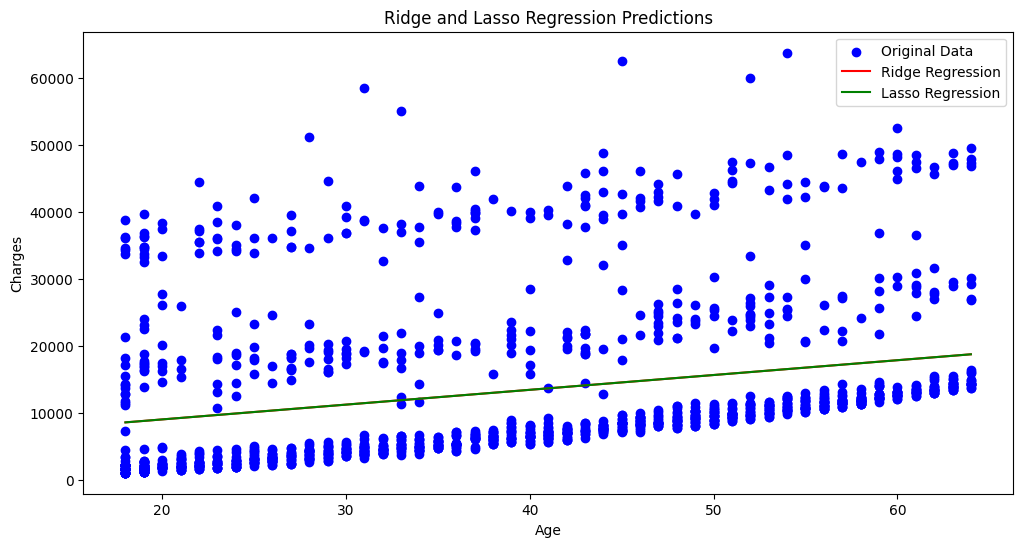

In [29]:
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(X['age'], y, color='blue', label='Original Data')
# Plotting Ridge and Lasso Predictions
plt.plot(age_values, ridge_pred, color='red', label='Ridge Regression')
plt.plot(age_values, lasso_pred, color='green', label='Lasso Regression')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Ridge and Lasso Regression Predictions')
plt.legend()
plt.show()

In [34]:
import plotly.graph_objects as go

In [35]:
fig = go.Figure()

In [36]:
fig.add_trace(go.Scatter(x=X['age'], y=y, mode='markers', name='Original Data', 
                         marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=age_values, y=ridge_pred, mode='lines', name='Ridge Regression', 
                         line=dict(color='red')))
fig.add_trace(go.Scatter(x=age_values, y=lasso_pred, mode='lines', name='Lasso Regression', 
                         line=dict(color='green')))

fig.update_layout(title='Ridge and Lasso Regression Predictions with Original Data',
                  xaxis_title='Age',
                  yaxis_title='Charges',
                  legend_title='Legend',
                  template='plotly_white')

fig.show()
